# Here to write what we plan to do and steps for doing it.

## Checkpoint 1 – Clustering and Outlier Detection (Part 1)
You need to:
- represent the dataset in a vector space,
- perform exploratory data analysis (averages, distributions, ...) of the dataset after data cleaning and report the data cleaning step and the results of the analysis
- apply at least one clustering or outlier detection method,
- report at least one limitation that cannot be resolved with the current tools.
- compare the results using a simpler baseline or another method. 

Only methods covered in Module 1 may be used.

## Clustering

We suppose that people in for ex in America do not have any effect on people in for example EE (Hypothesis)

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns            
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
%matplotlib inline     
sns.set(color_codes=True)

#Input data
df = pd.read_csv("/Users/ami/Documents/aarhus/data_mining/Data-Mining/loc-gowalla_totalCheckins.txt", sep = "\t", header = None)

In [130]:
# read csv is still using local file path.
headers = ["user_id", "checkin_time", "latitude", "longitude", "location_id"]
df.columns = headers
print(df.head(5))
print(df.tail(5))

   user_id          checkin_time   latitude  longitude  location_id
0        0  2010-10-19T23:55:27Z  30.235909 -97.795140        22847
1        0  2010-10-18T22:17:43Z  30.269103 -97.749395       420315
2        0  2010-10-17T23:42:03Z  30.255731 -97.763386       316637
3        0  2010-10-17T19:26:05Z  30.263418 -97.757597        16516
4        0  2010-10-16T18:50:42Z  30.274292 -97.740523      5535878
         user_id          checkin_time   latitude  longitude  location_id
6442887   196578  2010-06-11T13:32:26Z  51.742988  -0.488065       906885
6442888   196578  2010-06-11T13:26:45Z  51.746492  -0.490780       965121
6442889   196578  2010-06-11T13:26:34Z  51.741916  -0.496729      1174322
6442890   196585  2010-10-08T21:01:49Z  50.105516   8.571525       471724
6442891   196585  2010-10-07T17:39:18Z  50.027812   8.785098      4555073


In [131]:
print(df.dtypes)
print(df.shape)

duplicates = df[df.duplicated()]
print("number of duplicate rows: ", duplicates)

df = df.drop_duplicates()
print(df.shape)

user_id           int64
checkin_time     object
latitude        float64
longitude       float64
location_id       int64
dtype: object
(6442892, 5)
number of duplicate rows:           user_id          checkin_time   latitude   longitude  location_id
17780         94  2009-08-17T01:31:47Z  32.897642  -97.044339         9197
17788         94  2009-07-17T17:07:10Z  32.894526  -97.256234        13976
30684        130  2009-07-22T04:01:34Z  37.760350 -122.504984        18126
30752        130  2009-04-13T01:14:43Z  37.779271 -122.419238         9152
33378        138  2009-07-15T17:35:24Z  32.945454  -97.129183        11604
...          ...                   ...        ...         ...          ...
6408672   190424  2010-10-04T14:17:00Z  51.576336   -0.224533       524355
6417055   191980  2010-06-01T12:36:48Z  59.272065   15.229156       902263
6418387   192241  2010-04-11T13:07:08Z  57.781784   14.170381       164115
6418388   192241  2010-04-11T13:07:08Z  57.781784   14.170381       164115
6

In [132]:
print(df.isnull().sum())
# no empty values

user_id         0
checkin_time    0
latitude        0
longitude       0
location_id     0
dtype: int64


### Data Preprocessing

Text(0, 0.5, 'Latitude')

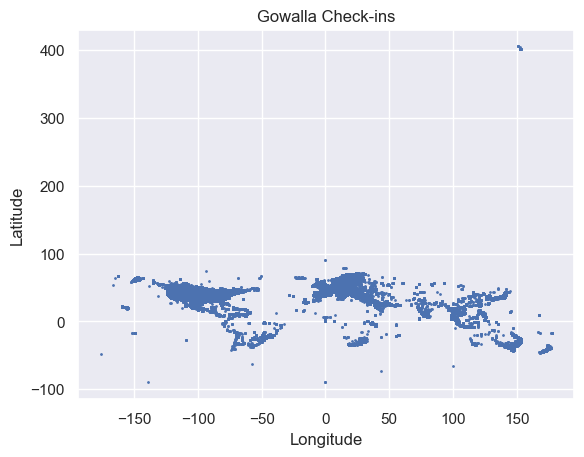

In [133]:
plt.scatter(df["longitude"], df["latitude"], s=1)
plt.title("Gowalla Check-ins")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

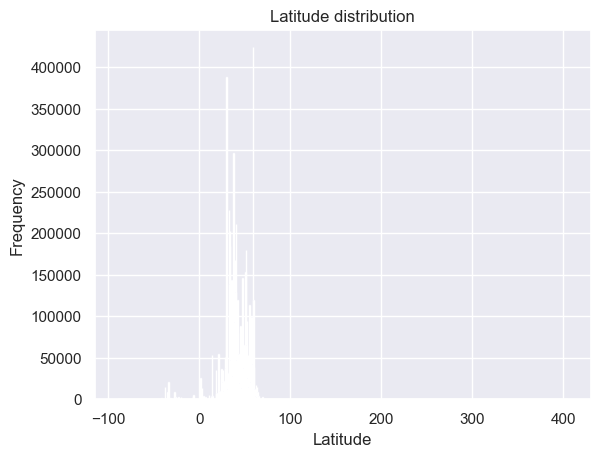

In [134]:
plt.figure()
plt.hist(df['latitude'], bins=1000, color="blue")
plt.title("Latitude distribution")
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.show()

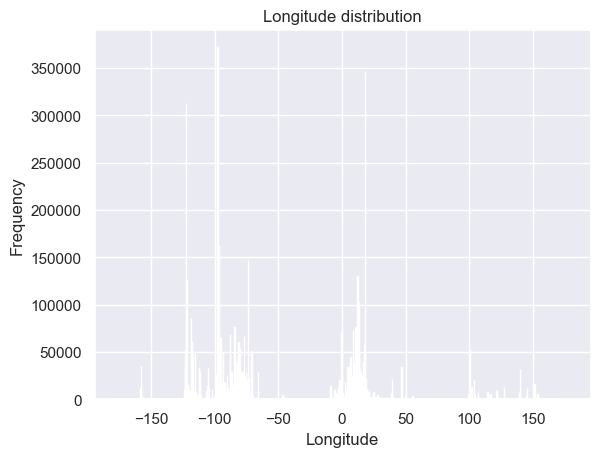

In [135]:
plt.figure()
plt.hist(df['longitude'], bins=1000, color="blue")
plt.title("Longitude distribution")
plt.xlabel("Longitude")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Latitude')

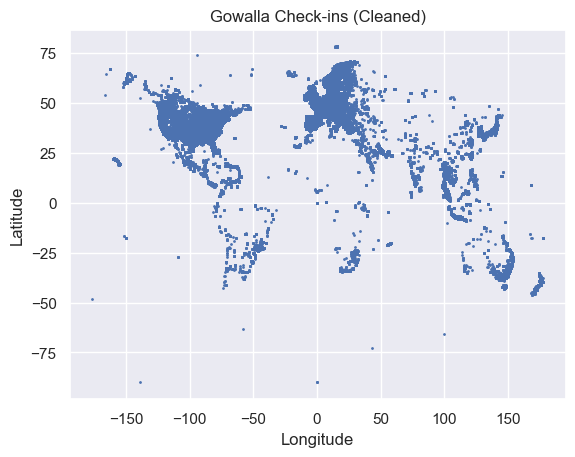

In [136]:
#Removing outliers
df = df.drop(df[df['latitude'] >= 90].index)
df = df.drop(df[df['longitude'] >= 180].index)
plt.scatter(df["longitude"], df["latitude"], s=1)
plt.title("Gowalla Check-ins (Cleaned)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [178]:
world = gpd.read_file("/Users/ami/Documents/aarhus/data_mining/Data-Mining/World_Countries_(Generalized)_4604138712334845015.zip")
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_points = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
world = world.to_crs(epsg=4326)
gdf_points = gpd.sjoin(gdf_points, world, how="left", predicate="intersects")

gdf_points['country'] = gdf_points['COUNTRY']

result = gdf_points[['user_id', 'checkin_time', 'latitude', 'longitude', 'location_id', 'country']]
result.to_csv('checkin_countries.csv', index=False)

451580
             user_id       latitude      longitude   location_id
count  451580.000000  451580.000000  451580.000000  4.515800e+05
mean    67745.841266      47.126735     -27.916588  6.494479e+05
std     55604.803414      14.256612      60.816830  8.884587e+05
min         0.000000     -90.000000    -176.308594  9.181000e+03
25%     14987.000000      40.722135     -73.993669  8.472900e+04
50%     54772.000000      51.596428      12.103309  3.318420e+05
75%    111011.000000      59.330158      18.061373  9.320930e+05
max    196577.000000      78.276389     177.380958  5.976149e+06


<Axes: xlabel='longitude', ylabel='latitude'>

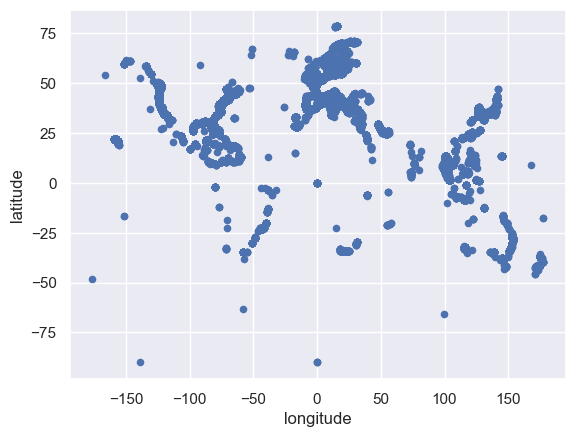

In [179]:
print(pd.isna(result['country']).sum())
print(result[result['country'].isna()].describe())
result[result['country'].isna()].plot.scatter(x='longitude', y='latitude')